In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import sys
import numpy as np
import sympy as sym
from sympy.printing import octave_code, ccode
import copy

new_paths = ['../Models/', '../Misc/', 'faultdiagnosistoolbox/build/lib.macosx-10.6-x86_64-2.7/']
[sys.path.append(d) for d in new_paths if not d in sys.path];
from misc import *
import faultdiagnosistoolbox as fdt
import faultdiagnosistoolbox.CodeGeneration as codegen

In [2]:
import VEP4Engine
reload(VEP4Engine)
model = VEP4Engine.model;

In [3]:
model.Lint()

Model: VEP4 model

  Type:Symbolic, dynamic

  Variables and equations
    90 unknown variables
    10 known variables
    11 fault variables
    94 equations, including 14 differential constraints

  Degree of redundancy: 4
  Degree of redundancy of MTES set: 1


  Model validation finished with 0 errors and 0 warnings.


<IPython.core.display.Javascript object>


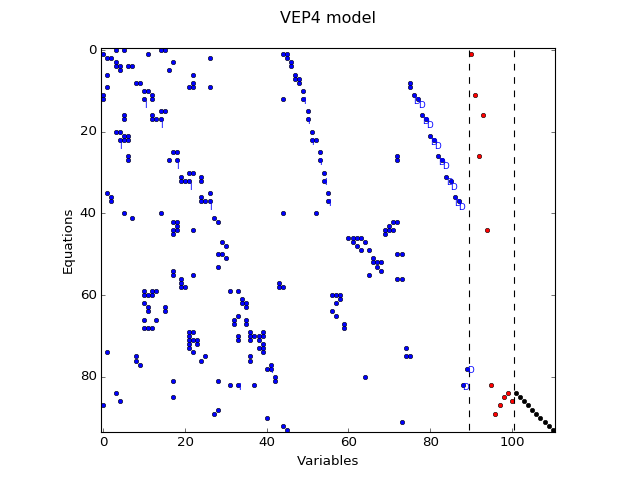

In [4]:
plt.figure(10)
model.PlotModel(verbose=False)

<IPython.core.display.Javascript object>


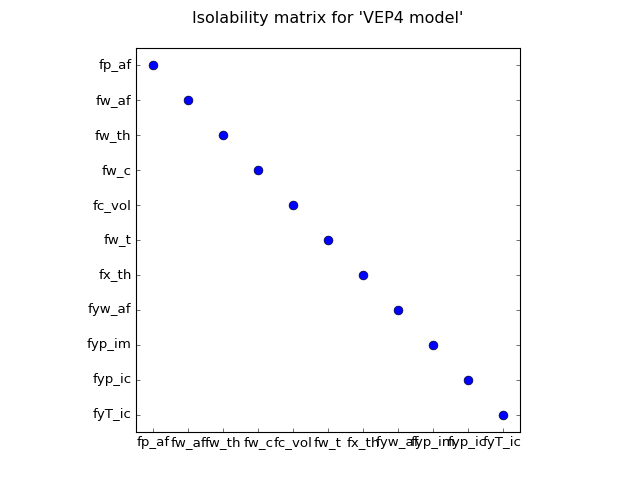

<IPython.core.display.Javascript object>


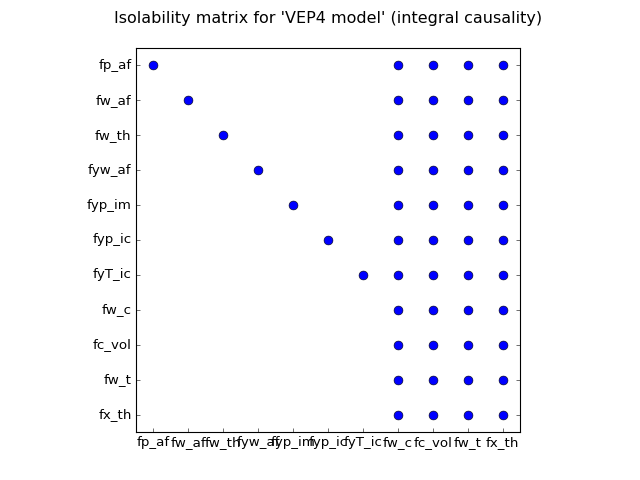

<IPython.core.display.Javascript object>


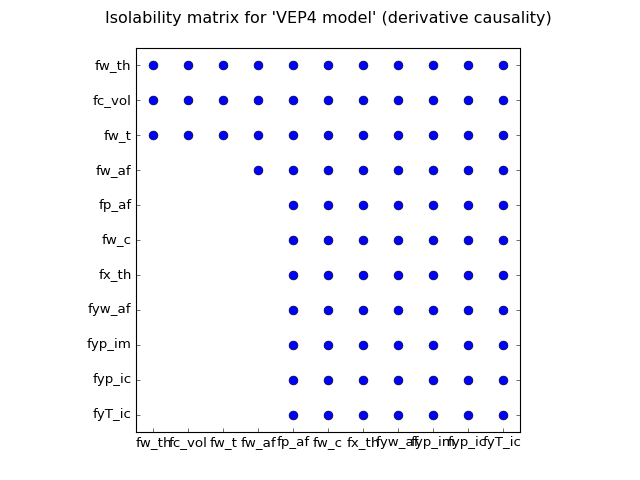

<IPython.core.display.Javascript object>


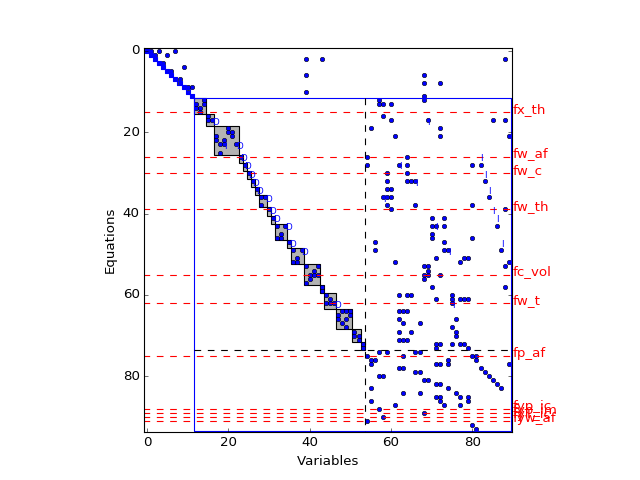

In [7]:
plt.figure(20)
model.IsolabilityAnalysis(plot=True)

plt.figure(21)
model.IsolabilityAnalysis(plot=True, causality='int')

plt.figure(22)
model.IsolabilityAnalysis(plot=True, causality='der')

plt.figure(23)
model.PlotDM(fault=True,eqclass=True)

In [8]:
print "Searchin for MSO sets..."
msos = model.MSO();
print "Found " + str(len(msos)) + " MSO sets"

Searchin for MSO sets...
Found 4496 MSO sets


In [9]:
print "Checking index properties of MSO sets..."
li = map(lambda m:model.IsLowIndex(eq=m), msos)
print str(sum(li)) + " MSO sets are low-index"

Checking index properties of MSO sets...
206 MSO sets are low-index


In [13]:
mso = msos[np.where(li)[0][0]]
print model.MSOCausalitySweep(mso)

['mixed', 'mixed', 'int', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'int', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed', 'mixed']


In [14]:
red = mso[2]
m0 = [e for e in mso if e != red]
Gamma = model.Matching(m0)